미니 프로젝트: 가위바위보 분류기를 만들자
===

### 데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), "images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), "images resized.")
    return len(images)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./RSP_data/scissor"
scissor_cnt = resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

744 images to be resized.
744 images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = "./RSP_data/rock"
rock_cnt = resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

756 images to be resized.
756 images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = "./RSP_data/paper"
paper_cnt = resize_images(image_dir_path)
print("보 이미지 resize 완료!")

752 images to be resized.
752 images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data = scissor_cnt+rock_cnt+paper_cnt):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위: 0, 바위: 1, 보: 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(-1, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0          # 가위: 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = "./RSP_data"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/256   # 입력은 0~1 사이의 값으로 정규화

print(f"x_train shape: {x_train_norm.shape}")
print(f"y_train shape: {y_train.shape}")

학습데이터(x_train)의 이미지 개수는 2252 입니다.
x_train shape: (2252, 28, 28, 3)
y_train shape: (2252,)


라벨: 0


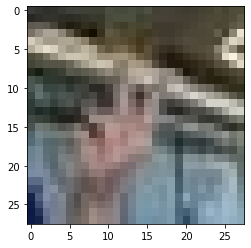

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨:', y_train[0])

### 딥러닝 네트워크 설계하기

In [13]:
import tensorflow as tf
from tensorflow import keras

n_channel_1=8
n_channel_2=16
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 layer 개수:', len(model.layers))
model.summary()

Model에 추가된 layer 개수: 7
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (N

### 딥러닝 네트워크 학습시키기

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
71/71 [==============================] - 5s 37ms/step - loss: 0.9708 - accuracy: 0.5471
Epoch 2/10
71/71 [==============================] - 3s 36ms/step - loss: 0.5768 - accuracy: 0.7833
Epoch 3/10
71/71 [==============================] - 2s 31ms/step - loss: 0.3760 - accuracy: 0.8668
Epoch 4/10
71/71 [==============================] - 2s 32ms/step - loss: 0.2716 - accuracy: 0.9059
Epoch 5/10
71/71 [==============================] - 3s 36ms/step - loss: 0.2002 - accuracy: 0.9392
Epoch 6/10
71/71 [==============================] - 2s 30ms/step - loss: 0.1469 - accuracy: 0.9596
Epoch 7/10
71/71 [==============================] - 3s 36ms/step - loss: 0.1204 - accuracy: 0.9618
Epoch 8/10
71/71 [==============================] - 2s 30ms/step - loss: 0.0903 - accuracy: 0.9787
Epoch 9/10
71/71 [==============================] - 2s 33ms/step - loss: 0.0755 - accuracy: 0.9809
Epoch 10/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0551 - accuracy: 0.9911


### 얼마나 잘 만들었는지 확인하기 (테스트)

In [9]:
resize_images("./RSP_data/test/scissor")
print("가위 이미지 resize 완료!")

resize_images("./RSP_data/test/rock")
print("바위 이미지 resize 완료!")

resize_images("./RSP_data/test/paper")
print("보 이미지 resize 완료!")

100 images to be resized.
100 images resized.
가위 이미지 resize 완료!
100 images to be resized.
100 images resized.
바위 이미지 resize 완료!
100 images to be resized.
100 images resized.
보 이미지 resize 완료!


In [10]:
image_dir_path = "./RSP_data/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/256   # 입력은 0~1 사이의 값으로 정규화

print(f"x_test_norm shape: {x_test_norm.shape}")
print(f"y_test shape: {y_test.shape}")

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_norm shape: (2252, 28, 28, 3)
y_test shape: (2252,)


라벨: 0


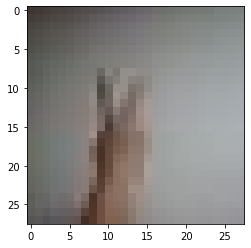

In [11]:
plt.imshow(x_test[0])
print('라벨:', y_test[0])

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

71/71 - 2s - loss: 0.5547 - accuracy: 0.9258 - 2s/epoch - 33ms/step
test_loss: 0.554707944393158
test_accuracy: 0.9258437156677246
